Medical Insurance Cost Prediction 

About The Dataset-

- age: Age Of Primary Beneficiary

- sex: Insurance Contractor Gender, Female, Male

- bmi: Body Mass Index, Providing An Understanding Of Body, Weights That Are Relatively High Or Low Relative To Height,
  Objective Index Of Body Weight (kg / m ^ 2) Using The Ratio Of Height To Weight, Ideally 18.5 To 24.9

- children: Number Of Children Covered By Health iInsurance / Number Of Dependents

- smoker: Smoking

- region: The Beneficiary's Residential Area In USA, NorthEast, SouthEast, SouthWest, NorthWest.

- charges: Individual Medical Costs Billed By Health Insurance

## Importing The Dependencies

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Importing The Dataset Into A Data Frame

In [119]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,22,female,29.188137,0.0,yes,northeast,24423
1,29,male,24.693457,0.0,no,northwest,17050
2,22,male,18.656686,0.0,no,northwest,13200
3,52,female,22.689573,4.0,no,southeast,32400
4,38,male,25.460056,0.0,yes,northeast,26035


### Shaping The Data

In [120]:
data.shape

(11321, 7)

### Information About The Dataset

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11321 entries, 0 to 11320
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       11321 non-null  int64  
 1   sex       11321 non-null  object 
 2   bmi       11223 non-null  float64
 3   children  11204 non-null  float64
 4   smoker    11202 non-null  object 
 5   region    11321 non-null  object 
 6   charges   11321 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 619.2+ KB


In [122]:
data.describe()

,age,bmi,children,charges
count,11321.000000,11223.000000,11204.000000,11321.000000
mean,40.127374,27.021652,1.734024,31190.230368
std,13.001285,4.775281,1.623254,11377.222700
min,18.000000,18.500000,0.000000,10000.000000
25%,29.000000,23.545431,0.000000,22921.000000
50%,40.000000,26.975122,1.000000,30250.000000
75%,51.000000,30.350017,3.000000,38398.000000
max,62.000000,38.500000,5.000000,88088.000000


### Checking For Null Values In The Dataset

In [123]:
data.isnull().sum()

age           0
sex           0
bmi          98
children    117
smoker      119
region        0
charges       0
dtype: int64

In [124]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['smoker'].fillna(data['smoker'].mode()[0], inplace=True)

In [125]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Value Count Of The Dataset by SEX

In [126]:
data.sex.value_counts()

female    7039
male      4282
Name: sex, dtype: int64

### Value Count Of The Dataset by REGION

In [127]:
data.region.value_counts()

southeast    3437
northeast    2864
northwest    2817
southwest    2203
Name: region, dtype: int64

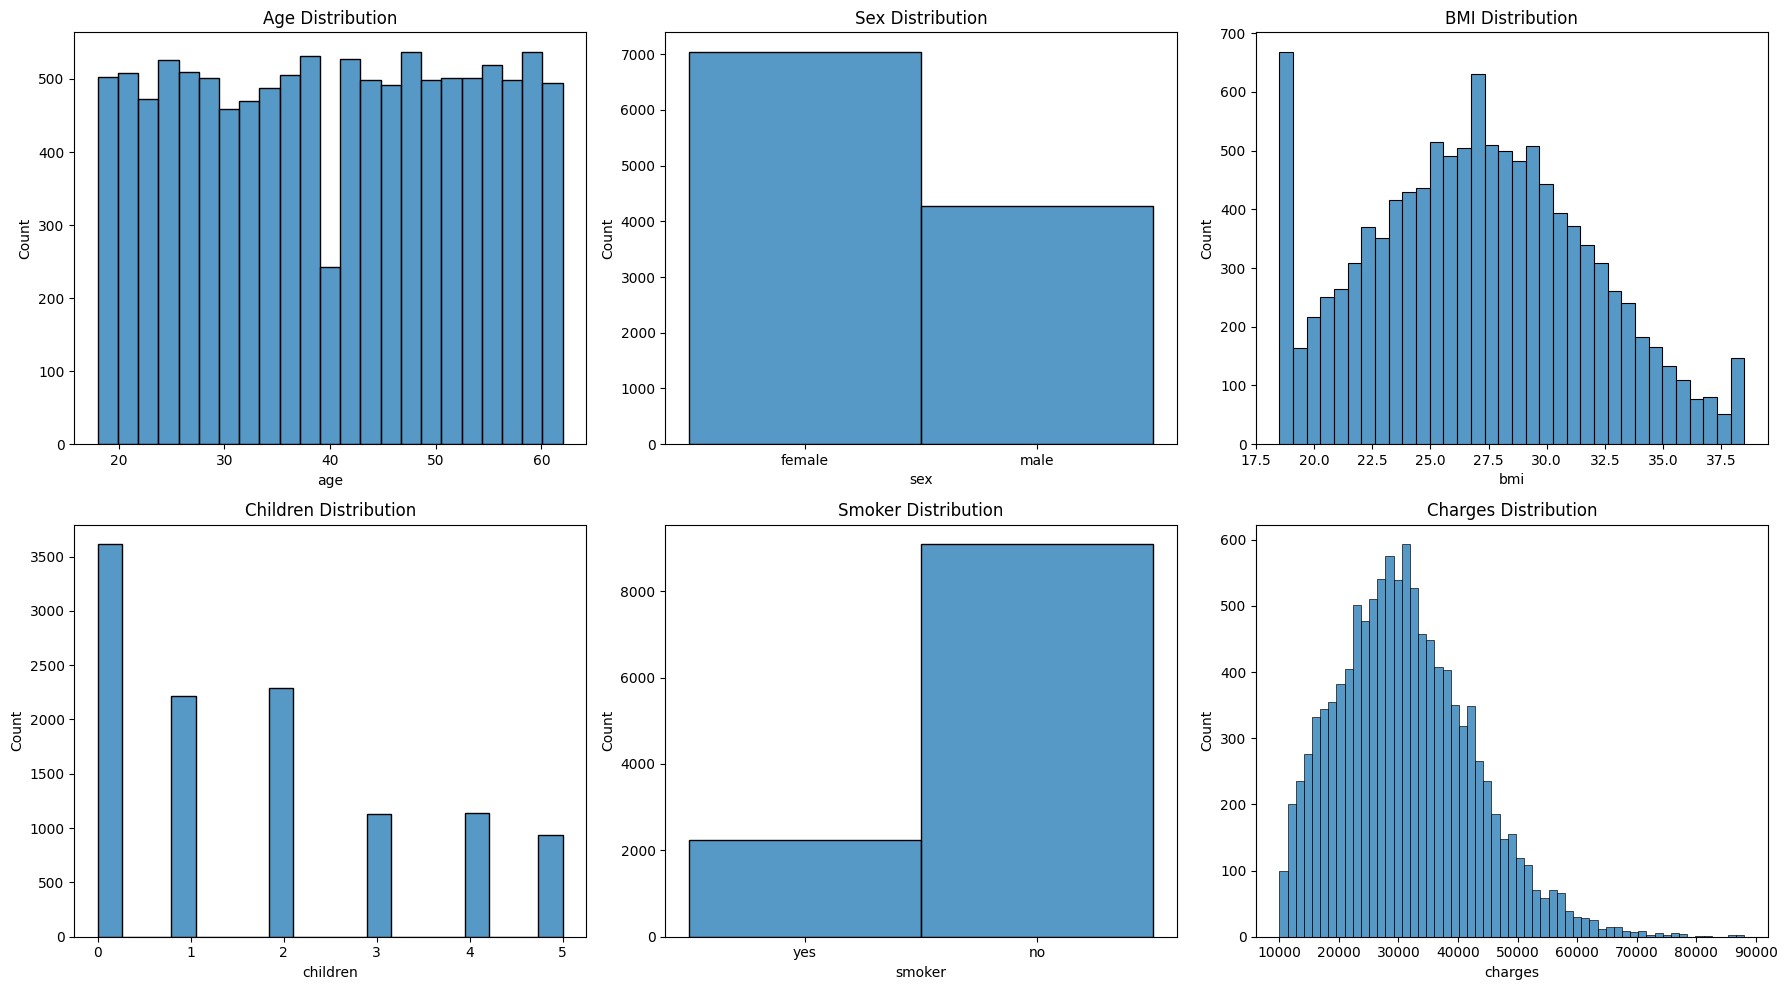

In [128]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(data['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(data['sex'], ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution')

sns.histplot(data['bmi'], ax=axes[0, 2])
axes[0, 2].set_title('BMI Distribution')

sns.histplot(data['children'], ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

sns.histplot(data['smoker'], ax=axes[1, 1])
axes[1, 1].set_title('Smoker Distribution')

sns.histplot(data['charges'], ax=axes[1, 2])
axes[1, 2].set_title('Charges Distribution')

plt.tight_layout()
plt.show()


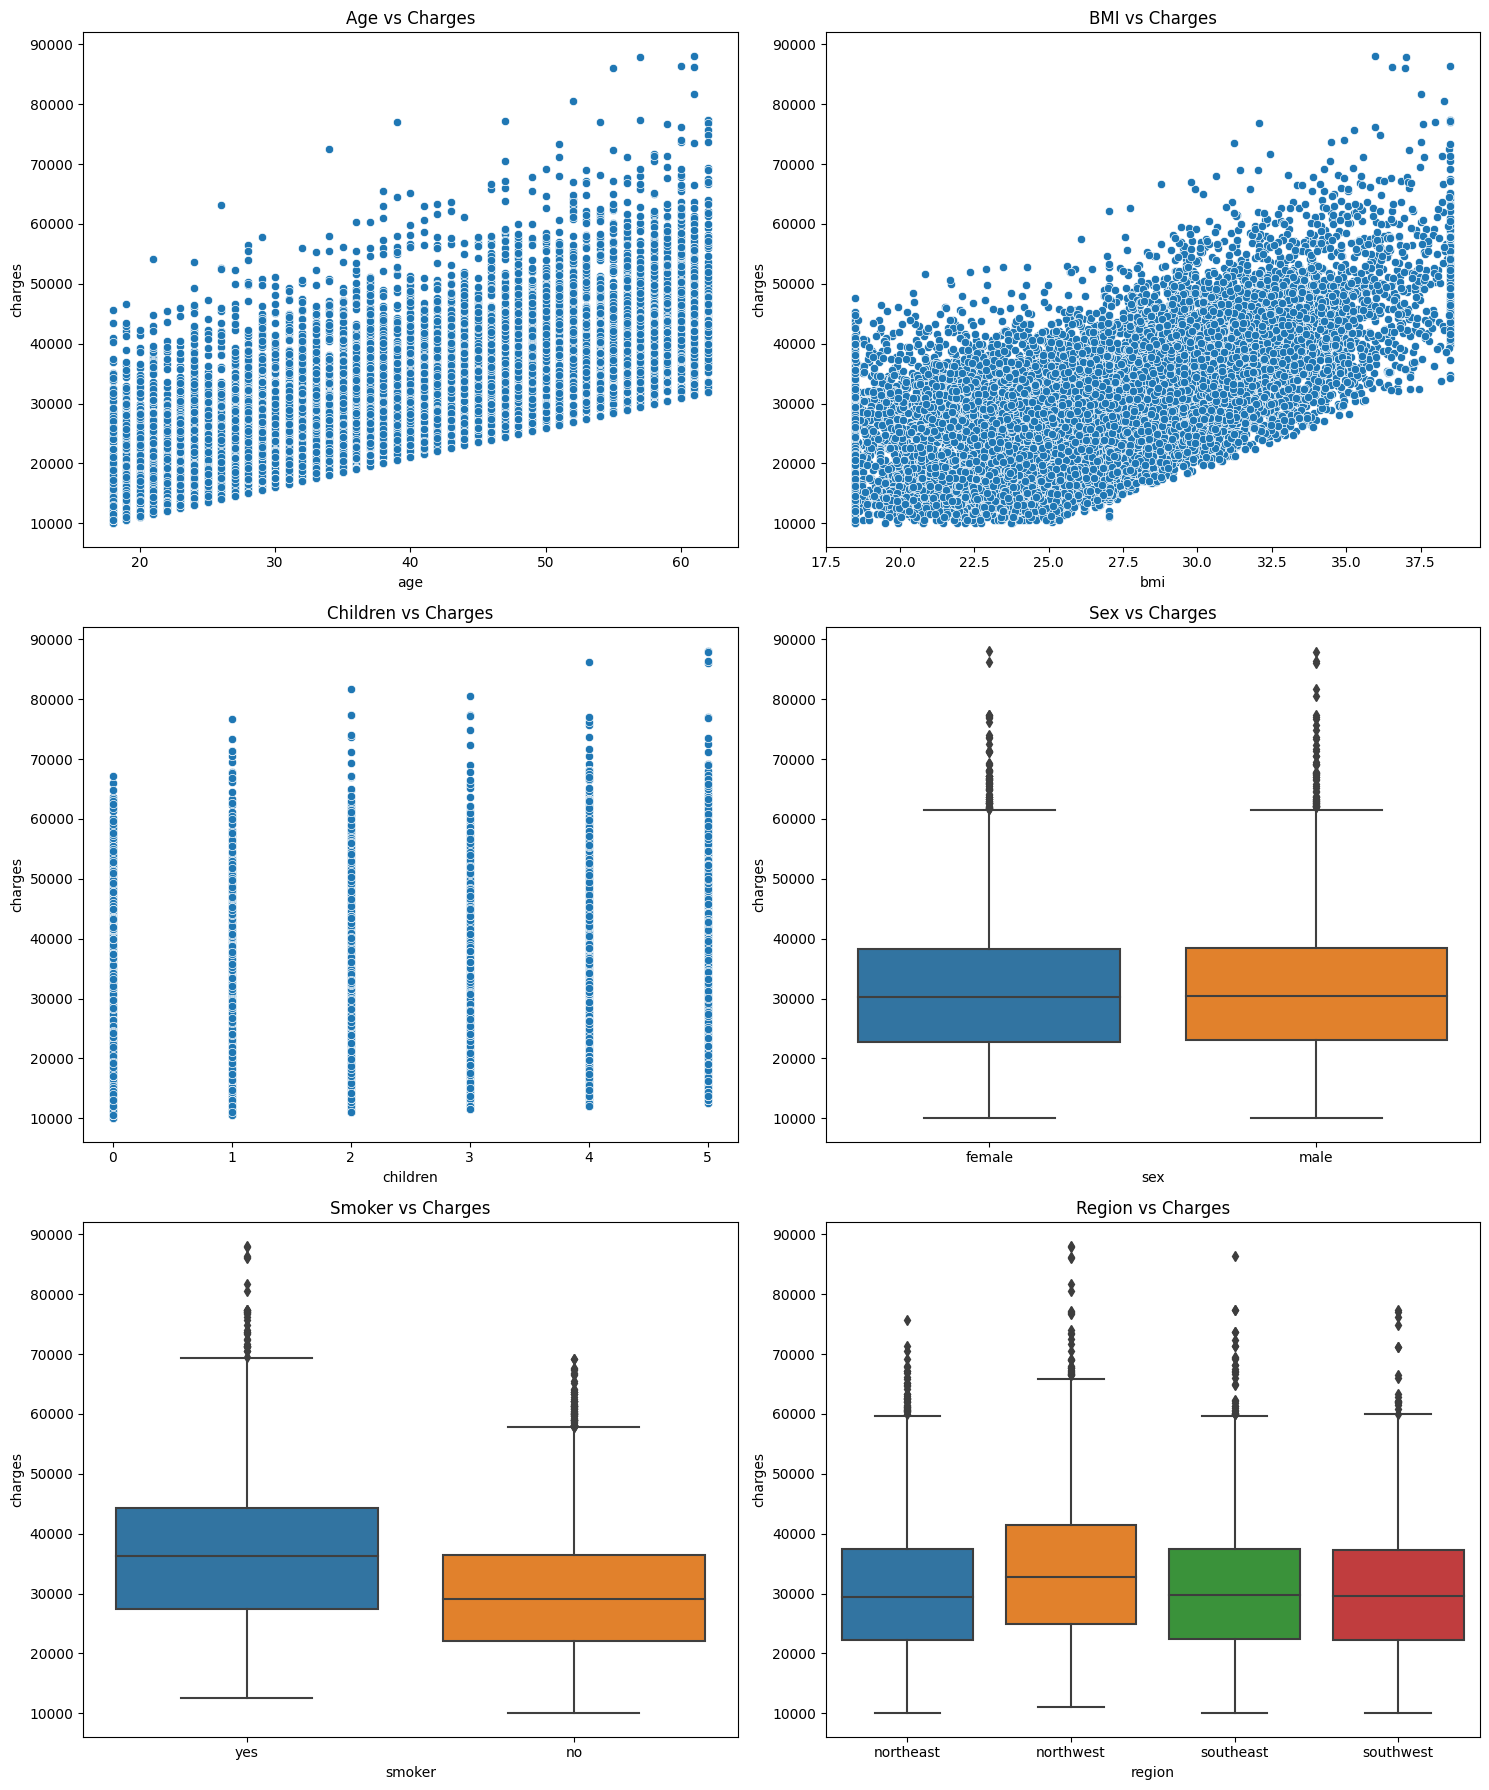

In [129]:
# Bivariate Analysis
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

sns.scatterplot(x='age', y='charges', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Charges')

sns.scatterplot(x='bmi', y='charges', data=data, ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Charges')

sns.scatterplot(x='children', y='charges', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Children vs Charges')

sns.boxplot(x='sex', y='charges', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Sex vs Charges')

sns.boxplot(x='smoker', y='charges', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Smoker vs Charges')

sns.boxplot(x='region', y='charges', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Region vs Charges')

plt.tight_layout()
plt.show()


C:\Users\HARISH\AppData\Local\Temp\ipykernel_9804\3226462806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


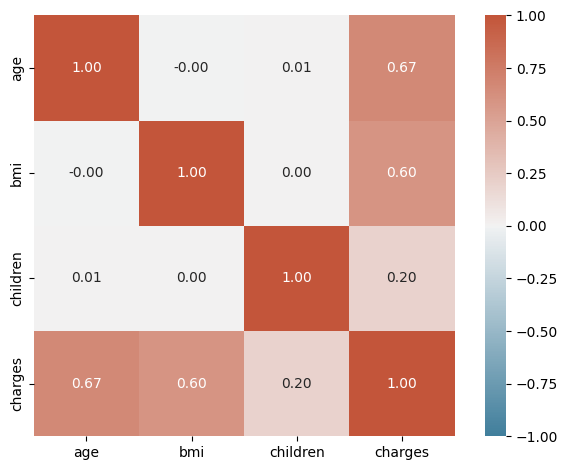

In [130]:
cor=data.corr()
sns.heatmap(cor, annot=True, fmt='.2f', cmap=cmap,
            cbar=True, square=True, annot_kws={"fontsize": 10},
            vmax=1, vmin=-1)

plt.tight_layout()
plt.show()

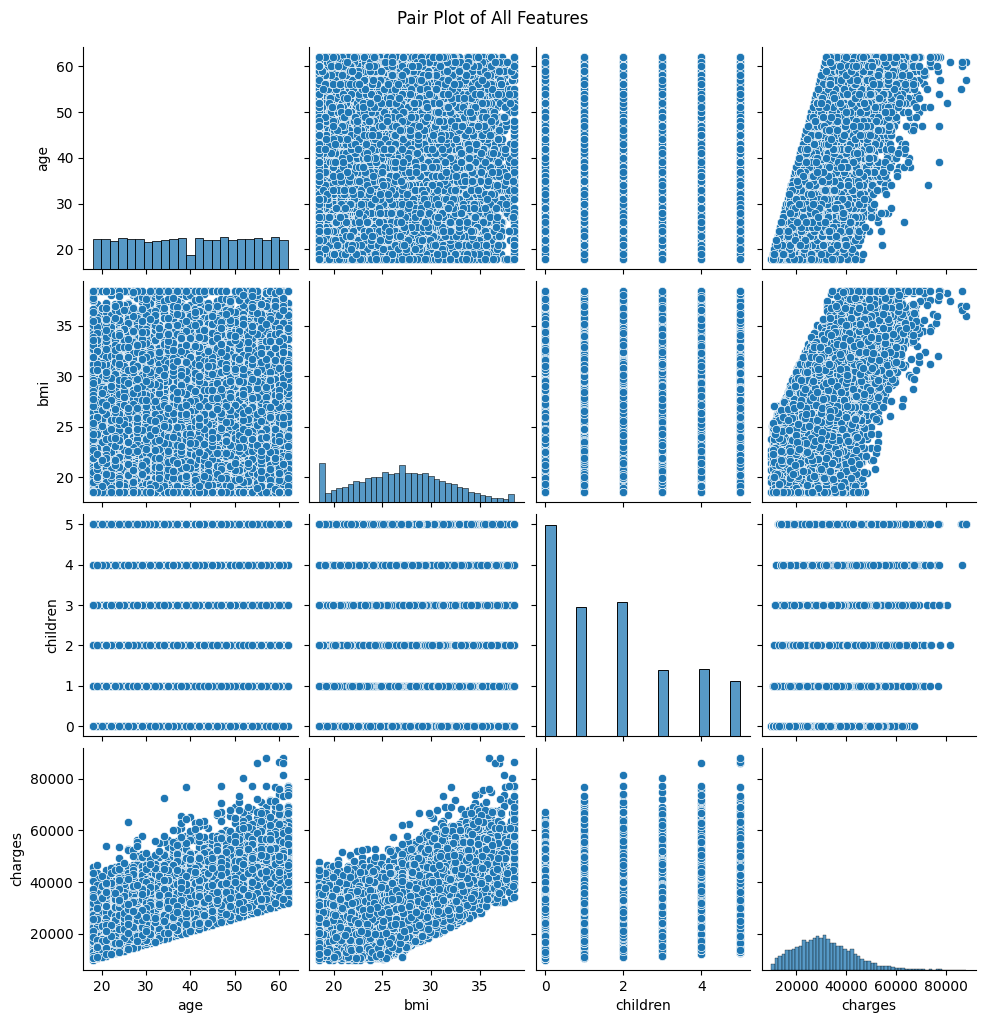

In [131]:
sns.pairplot(data)
plt.suptitle('Pair Plot of All Features', y=1.02)
plt.show()

### LabelEncoder

In [132]:
encoder = LabelEncoder()

### Encoding Labels

In [133]:
labels = encoder.fit_transform(data.sex)

### Label = SEX

In [134]:
data['sex'] = labels

In [135]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,22,0,29.188137,0.0,yes,northeast,24423
1,29,1,24.693457,0.0,no,northwest,17050
2,22,1,18.656686,0.0,no,northwest,13200
3,52,0,22.689573,4.0,no,southeast,32400
4,38,1,25.460056,0.0,yes,northeast,26035


SEX

- MALE -> 1
- FEMALE -> 0

In [136]:
labels = encoder.fit_transform(data.region)

### Label = REGION

In [137]:
data['region'] = labels

In [138]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,22,0,29.188137,0.0,yes,0,24423
1,29,1,24.693457,0.0,no,1,17050
2,22,1,18.656686,0.0,no,1,13200
3,52,0,22.689573,4.0,no,2,32400
4,38,1,25.460056,0.0,yes,0,26035


REGION

- Northeast -> 0
- Northwest -> 1
- Southeast -> 2
- Southwest -> 3

In [139]:
labels = encoder.fit_transform(data.smoker)

### Label = SMOKER

In [140]:
data['smoker'] = labels

In [141]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,22,0,29.188137,0.0,1,0,24423
1,29,1,24.693457,0.0,0,1,17050
2,22,1,18.656686,0.0,0,1,13200
3,52,0,22.689573,4.0,0,2,32400
4,38,1,25.460056,0.0,1,0,26035


SMOKER 

- Yes -> 1
- No -> 0

## Splitting The Parameters And Target Variable

In [155]:
X = data.drop(columns='charges',axis=1)
Y = data['charges']

## Train Test Split The Dataset

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=35)

In [157]:
print(X.shape,X_train.shape,X_test.shape)

(11321, 6) (7924, 6) (3397, 6)


## Model

In [158]:
model = RandomForestRegressor()

In [159]:
model.fit(X_train,Y_train)

RandomForestRegressor()

### Testing The Prediction

In [160]:
testing_data_prediction = model.predict(X_test)

## Accuracy Score

In [161]:
score = metrics.r2_score(Y_test,testing_data_prediction)
score

0.9826253136498676

In [163]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=35),
    'XGBoost': XGBRegressor(random_state=35)}

In [164]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    return r2, rmse

In [172]:
results = pd.DataFrame(columns=['Model', 'R2', 'RMSE'])

In [173]:
for model_name, model in models.items():
    r2, rmse = evaluate_model(model, X_train, X_test, Y_train, Y_test)
    results = results.append({'Model': model_name, 'R2': r2, 'RMSE': rmse}, ignore_index=True)

C:\Users\HARISH\AppData\Local\Temp\ipykernel_9804\1550166666.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
C:\Users\HARISH\AppData\Local\Temp\ipykernel_9804\1550166666.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
C:\Users\HARISH\AppData\Local\Temp\ipykernel_9804\1550166666.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
C:\Users\HARISH\AppData\Local\Temp\ipykernel_9804\1550166666.py:3: FutureWarning: The frame.append method is deprecated a

In [174]:
results

,Model,R2,RMSE
0,Linear Regression,0.919308,3256.591261
1,Ridge Regression,0.919307,3256.626885
2,Lasso Regression,0.919308,3256.602263
3,Random Forest,0.982481,1517.428068
4,XGBoost,0.991443,1060.501819


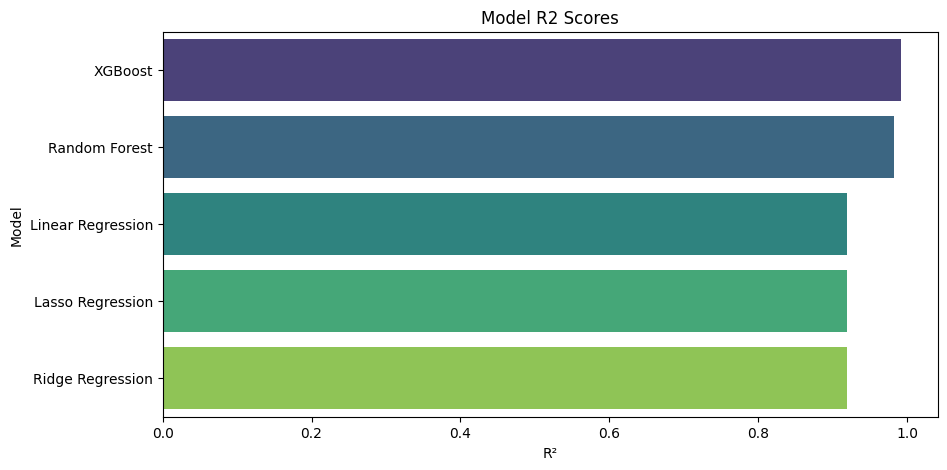

In [177]:
plt.figure(figsize=(10, 5))
results_sorted_r2 = results.sort_values(by='R2', ascending=False)
sns.barplot(x='R2', y='Model', data=results_sorted_r2, palette='viridis')
plt.title('Model R2 Scores')
plt.xlabel('R²')
plt.ylabel('Model')
plt.show()

## Building The Prediction System

In [178]:
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))

Predicted Medical Insurance Cost :  [20055.572]
